In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [298]:
orig = np.load('tourism_original.npy')

### Magnitude Warping

In [299]:
np.random.seed(0)

In [315]:
sigma = 0.05
np.random.seed(0)
random_warps = np.random.normal(loc=1.0, scale=sigma*6, size=(4+2, 304))
warp_steps = np.linspace(0,orig.shape[0]-1, num=4+2)
warper = np.zeros((204, 304))
for i in range(304):
    warper[:,i] = np.array([CubicSpline(warp_steps, random_warps[:,i])(np.arange(204))])
ret = orig * warper

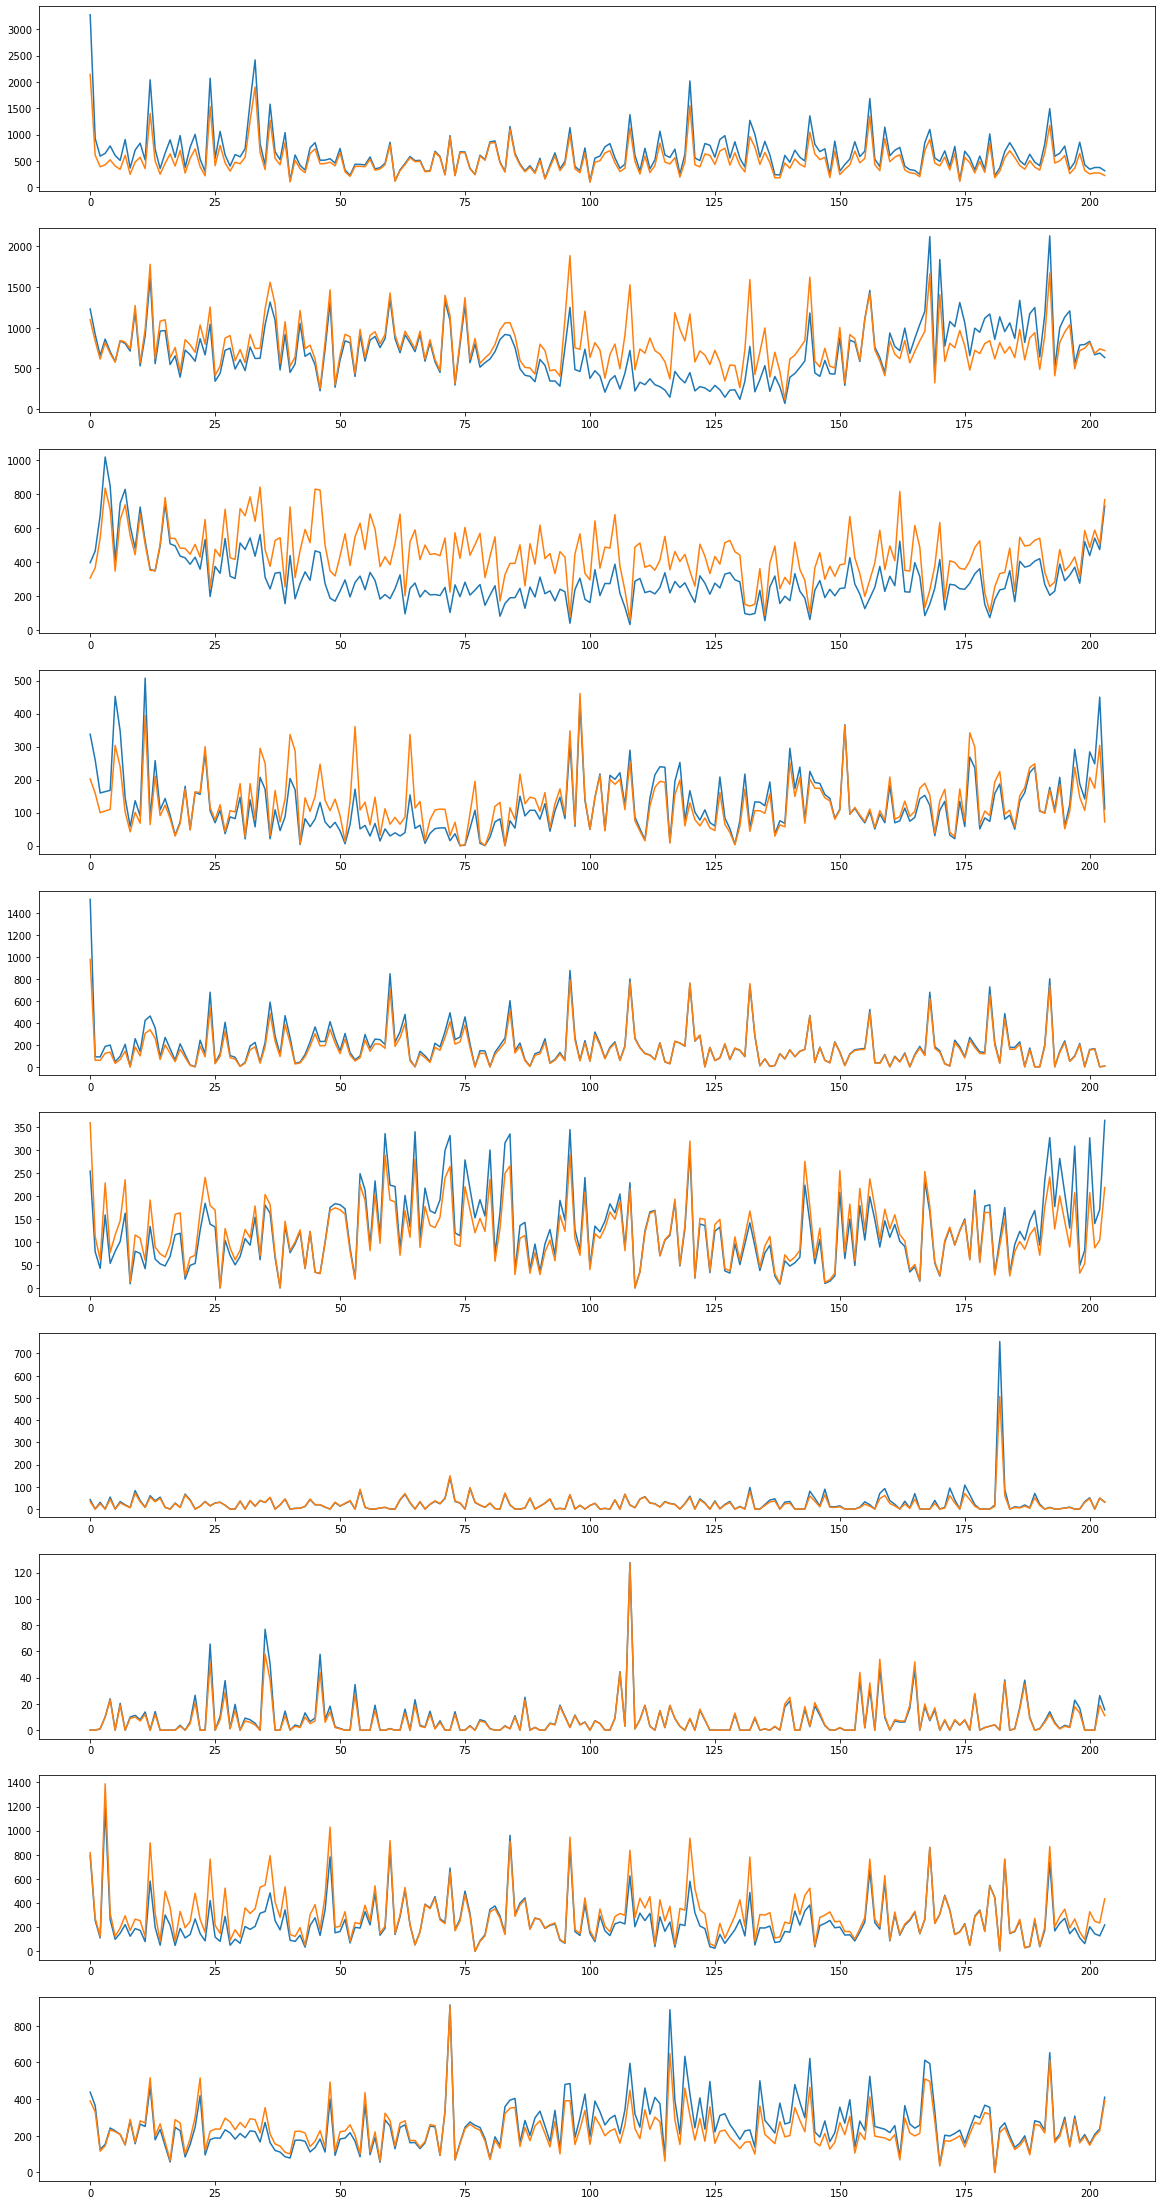

In [316]:
_, ax = plt.subplots(10,1,figsize=(20, 40))
ax = ax.ravel()

for i in range(10):
    ax[i].plot(ret[:,i])
    ax[i].plot(orig[:,i]);

### Time Warping

In [331]:
sigma = 0.01
random_warps = np.random.normal(loc=1.0, scale=sigma*6, size=(4+2, 304))
warp_steps = np.linspace(0,orig.shape[0]-1, num=4+2)
time_warp = np.zeros((204, 304))
ret = np.zeros((204, 304))
for i in range(304):
    time_warp[:,i] = CubicSpline(warp_steps, warp_steps * random_warps[:,i])(np.arange(204))
    ret[:,i] = np.interp(np.arange(204), time_warp[:,i], orig[:,i])

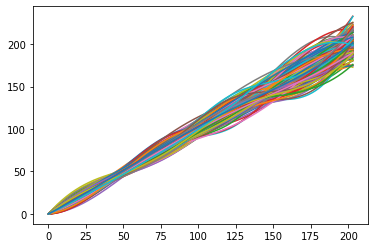

In [332]:
plt.plot(np.arange(204))
for i in range(200):
    plt.plot(time_warp[:,i]);

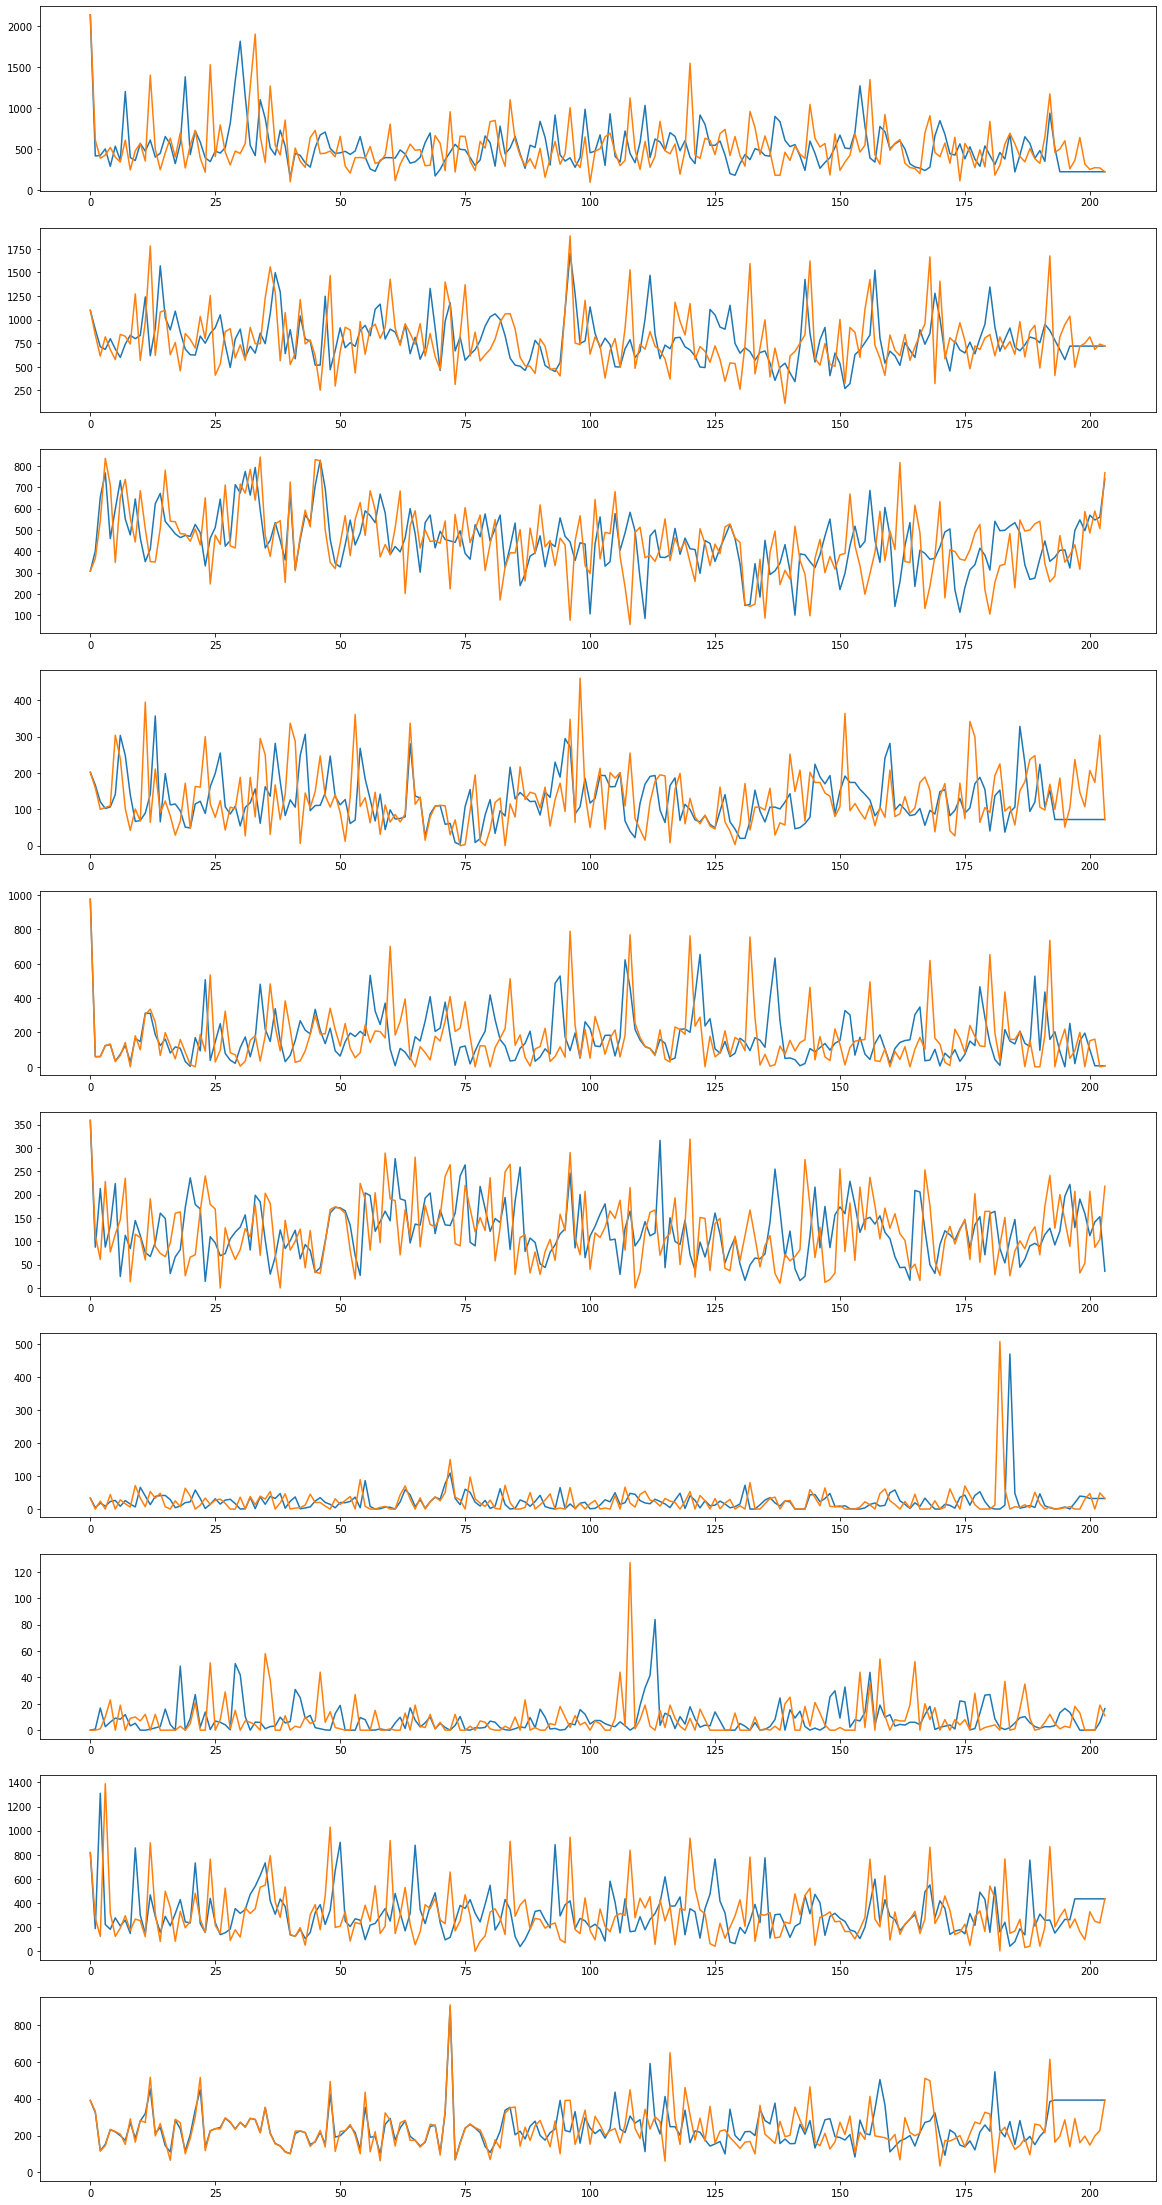

In [333]:
_, ax = plt.subplots(10,1,figsize=(20, 40))
ax = ax.ravel()

for i in range(10):
    ax[i].plot(ret[:,i])
    ax[i].plot(orig[:,i]);